## Visión por Computadora 1

## Trabajo Práctico N° 3

### Grupo

| Autores               | E-mail                    | Nº SIU  |
|---------------------- |---------------------------|---------|
| Braian Desía          | b.desia@hotmail.com       | a1804   |
| Juan José Cardinali   | juanchijc@gmail.com       | a1809   |

### ENUNCIADO

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en *Material_TPs/TP3/images* a partir del template *Material_TPs/TP3/template*.

1. (4 puntos) Obtener una detección del logo en cada img sin falsos positivos.

2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la img *coca_multi.png* con el mismo template del ítem1.

3. (2 puntos) Generalizar el algoritmo del item2 para todas las imágenes.

Visualizar los resultados con bounding boxes en cada img mostrando el nivel de confianza de la detección.

### RESOLUCIÓN

#### LIBRERÍAS

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2 as cv
import pandas as pd

#### DETECCIÓN DEL LOGO

In [2]:
# Definimos la lista de archivos a leer

def get_files(folderpath, extensions, excludes):
    # Filtra solo los archivos que tengan las extensiones deseadas y no estén en la lista de exclusiones
    files_list = []
    for file_name in os.listdir(folderpath):
        if any(file_name.endswith(ext) for ext in extensions) and file_name not in excludes:
            files_list.append(file_name)
    return files_list

folderpath = './imagenes/'  # Asegúrate de que esta ruta sea correcta

# Obtener imágenes de la carpeta
imgs_to_read = get_files(folderpath, ['.png', '.jpg'], ['coca_multi.png'])
imgs_to_read

['COCA-COLA-LOGO.jpg',
 'coca_logo_1.png',
 'coca_logo_2.png',
 'coca_retro_1.png',
 'coca_retro_2.png',
 'logo_1.png']

In [3]:
# Cantidad de imagenes a leer
n_img_to_read = len(imgs_to_read)
n_img_to_read

6

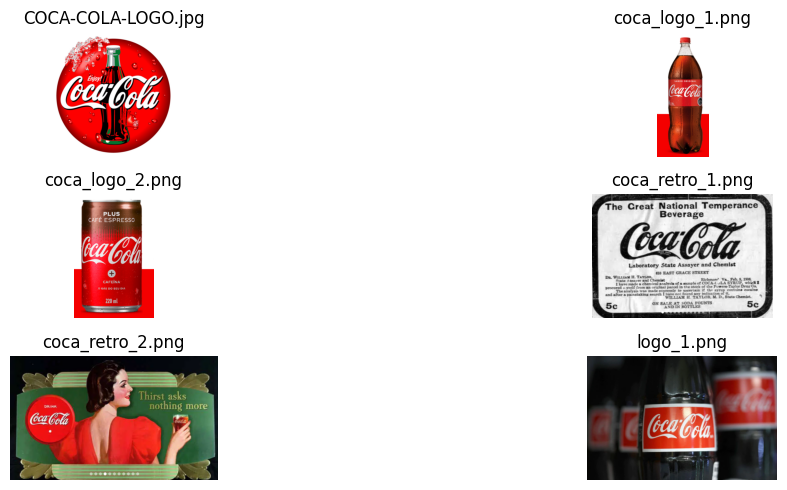

               Nombre  Alto  Ancho  Canales
0  COCA-COLA-LOGO.jpg  1389   1389        3
1     coca_logo_1.png   500    207        3
2     coca_logo_2.png   363    233        3
3    coca_retro_1.png   493    715        3
4    coca_retro_2.png   429    715        3
5          logo_1.png   450    687        3


In [4]:
# Variables de configuración
cols = 2
n_img_to_read = len(imgs_to_read)  # Número total de imágenes a leer

# Grilla de ploteo
rows = (n_img_to_read + cols - 1) // cols  # Calculo para obtener el número de filas necesarias

plt.figure(figsize=(15, 5))  # Ajusta el tamaño de la figura según sea necesario

data = []
for idx, img_name in enumerate(imgs_to_read):

    img_path = folderpath + img_name
    img = cv.imread(img_path)
    
    if img is None:
        print(f"Error al leer la imagen: {img_name}")
        continue  # Si la imagen no se carga, pasar a la siguiente

    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    shape = img.shape
    data.append({
        'Nombre': img_name,
        'Alto': shape[0],
        'Ancho': shape[1],
        'Canales': shape[2] if len(shape) == 3 else 1
    })
    
    # Ploteo de la imagen en la cuadrícula
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(imgRGB)
    plt.title(img_name)
    plt.axis('off')  # Desactiva los ejes

# Mostrar la cuadrícula completa
plt.tight_layout()  # Ajustar el espaciado entre las subgráficas
plt.show()

# Crear un DataFrame con las propiedades de las imágenes
df_img_shapes = pd.DataFrame(data)

# Imprimir el DataFrame (opcional)
print(df_img_shapes)

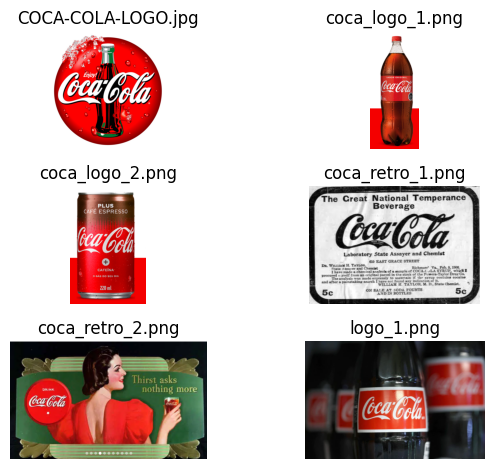

In [5]:
# Visualizamos las imágenes

# Grilla de ploteo
cols = 2
rows = (n_img_to_read + cols - 1) // cols

plt.figure()

data=[]
for idx, img_name in enumerate(imgs_to_read):

    img_path = folderpath + img_name
    img = cv.imread(img_path)
    imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    shape = img.shape
    data.append({
            'Nombre': img_name,
            'Alto': shape[0],
            'Ancho': shape[1],
            'Canales': shape[2] if len(shape) == 3 else 1
        })
    
    plt.subplot(rows, cols, idx + 1)
    plt.imshow(imgRGB)
    plt.title(img_name)
    plt.axis('off')
    
plt.tight_layout() 
plt.show()

df_img_shapes = pd.DataFrame(data)

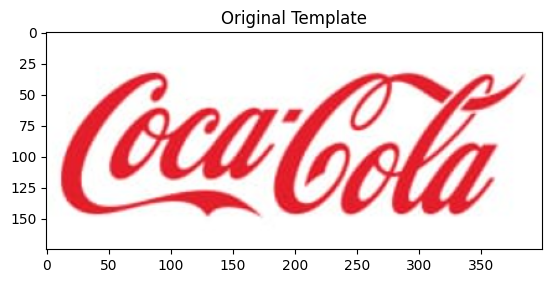

In [6]:
# Leemos el template
template = cv.imread('./templates/pattern.png')
templateRGB = cv.cvtColor(template, cv.COLOR_BGR2RGB)
templateGRAY = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

# Display template
plt.figure()
plt.imshow(templateRGB)
plt.title('Original Template')
plt.show()

In [7]:
# Verificamos el tamaño del template respecto

df_img_shapes['TemplateEscalaOk'] = df_img_shapes.apply(
    lambda row: True if ((row['Alto'] > 175) and (row['Ancho'] > 400)) else False,
    axis=1
)
df_img_shapes

,Nombre,Alto,Ancho,Canales,TemplateEscalaOk
0,COCA-COLA-LOGO.jpg,1389,1389,3,True
1,coca_logo_1.png,500,207,3,False
2,coca_logo_2.png,363,233,3,False
3,coca_retro_1.png,493,715,3,True
4,coca_retro_2.png,429,715,3,True
5,logo_1.png,450,687,3,True


**OBSERVACIONES:**

- Las imágenes 'coca_logo_1.png' y 'coca_logo_2.png' son más chicas que el template. O debemos achicar el template, o agrandar la imagen, o ambas en un punto intermedio.

- En base al punto anterior, se plantea la implementación de Pirámides Gaussianas para reducir el tamaño de la imagen objetivo.



In [13]:
# Los 6 métodos posibles para comparación:
methods = ['cv.TM_CCOEFF',                  # Coeficiente de correlación (máximo)
            'cv.TM_CCOEFF_NORMED',          # Coeficiente de correlación normalizado (máximo) 
            'cv.TM_CCORR',                  # Correlación cruzada (máximo)
            'cv.TM_CCORR_NORMED',           # Correlación cruzada normalizada (máximo) 
            'cv.TM_SQDIFF',                 # Suma de diferencias al cuadrado  (mínimo)
            'cv.TM_SQDIFF_NORMED']          # Suma de diferencias al cuadrado normalizado (mínimo)

def get_pyramid(img, levels):
    """ Crea una pirámide gaussiana a partir de la imagen dada."""
    
    pyramid = [img]
    for i in range(levels):
        img = cv.pyrDown(img)  # Reduce la imagen
        pyramid.append(img)
    return pyramid

def template_matching(img_target, template, meth, levels=3):
    """ Realiza la coincidencia de patrones entre una imagen y un template, utilizando pirámides gaussianas. """
    
    # Obtener dimensiones del template
    w, h = template.shape[1], template.shape[0]
    
    # Crear la pirámide gaussiana del template
    pyramid_temp = get_pyramid(template, levels)
    
    # Inicializar variables para seguimiento de coincidencias
    best_value = -float('inf')
    if eval(meth) in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        best_value *= -1 

    best_location = None
    best_res = None
    
    # Ejecutar coincidencia en cada nivel de la pirámide
    for i, scaled_template in enumerate(pyramid_temp):
        # Comprobar si el tamaño de la plantilla es adecuado
        w_pyramid, h_pyramid = scaled_template.shape[1], scaled_template.shape[0]
        if img_target.shape[0] < h_pyramid or img_target.shape[1] < w_pyramid:
            continue
        
        # Aplicamos la coincidencia de patrones
        res = cv.matchTemplate(img_target, scaled_template, eval(meth))
        
        # Encontramos los valores mínimos y máximos
        min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
        
        # Si el método es TM_SQDIFF o TM_SQDIFF_NORMED, tomamos el mínimo
        if eval(meth) in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            current_value = min_val
            current_loc = min_loc
        else:
            current_value = max_val
            current_loc = max_loc
        
        # Comprueba si la coincidencia es la mejor encontrada
        if eval(meth) in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
            if current_value < best_value:
                best_value = current_value
                best_location = current_loc
                best_res = res
        else:
            if current_value > best_value:
                best_value = current_value
                best_location = current_loc
                best_res = res

    # Asegurarse de que se encontró una coincidencia antes de continuar
    if best_location is None:
        print("No se encontraron coincidencias.")
        return img_target  # Retorna la imagen original si no se encontró nada

    # Marcar la mejor coincidencia encontrada en la imagen de la última pirámide
    top_left = best_location
    bottom_right = (top_left[0] + w, top_left[1] + h)
    
    cv.rectangle(img_target, top_left, bottom_right, 255, 2)

    # Graficamos el procesamiento y la salida
    plt.figure(figsize=(10, 5))
    
    # Resultado de coincidencia
    plt.subplot(121)
    plt.imshow(best_res, cmap='gray')
    plt.title('Matching Result')
    plt.xticks([]), plt.yticks([])
    
    # Imagen original con recuadros
    plt.subplot(122)
    plt.imshow(img_target, cmap='gray')
    plt.title('Detected Point')
    plt.xticks([]), plt.yticks([])
    
    plt.suptitle(meth)
    plt.show()


# def best_template_matching():
    
#     best_sqdiff_score = float('inf')
#     best_sqdiff_result = None
#     best_sqdiff_method = None

#     best_corr_score = -float('inf')
#     best_corr_result = None
#     best_corr_method = None
    
#     # Almacenar cada resultado
#     all_results = []


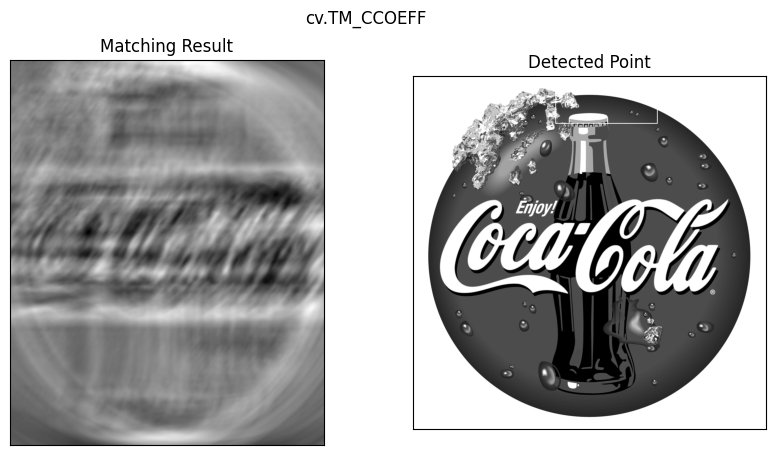

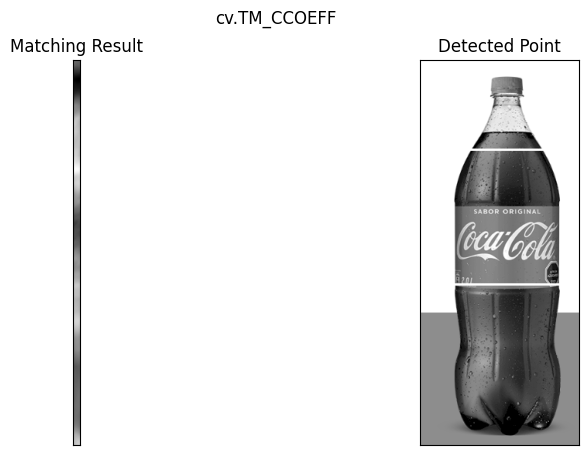

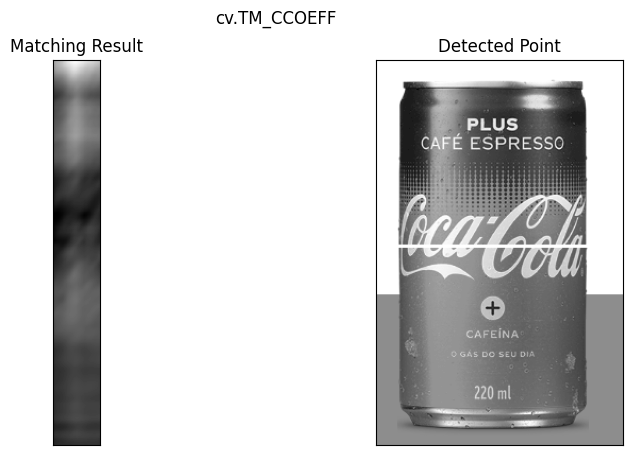

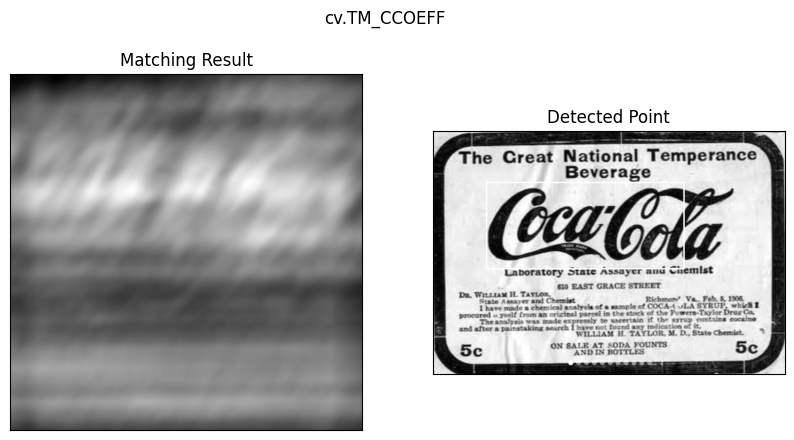

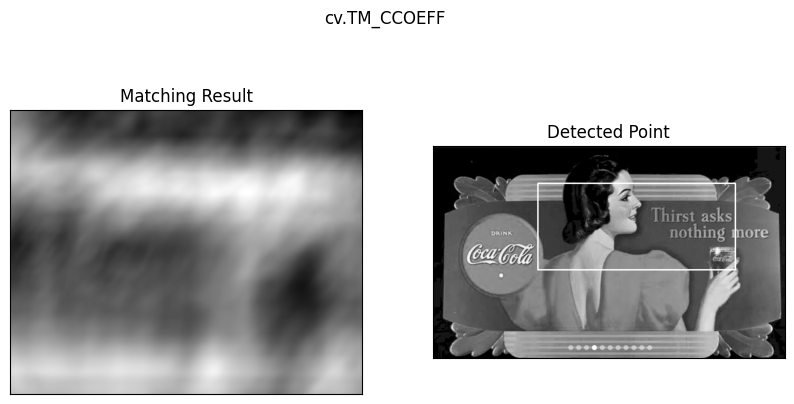

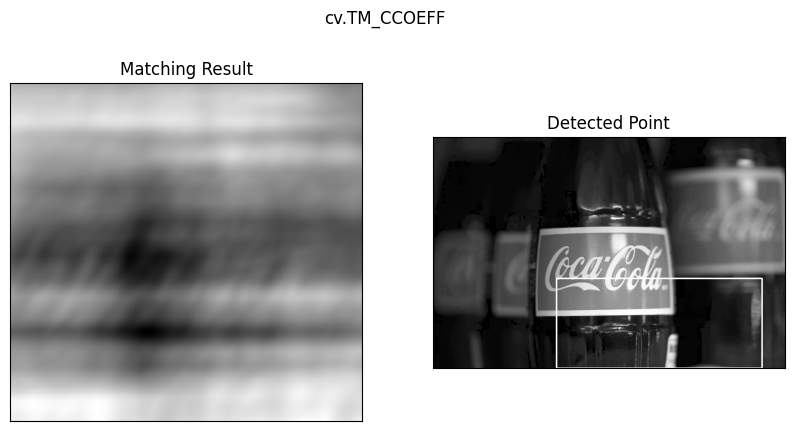

In [14]:
for img_name in imgs_to_read:

    img_path = folderpath + img_name
    img_target = cv.imread(img_path, 0)
    
    template_matching(img_target, templateGRAY, methods[0], levels=3)

### DETECCIÓN MULTIPLE

In [10]:
def multiple_detection(img_target, template, threshold = 0.3):

    # Convert image to gray scale
    img_gray = cv.cvtColor(img_target, cv.COLOR_BGR2GRAY)

    w, h = template.shape[::-1]
    res = cv.matchTemplate(img_target,template, cv.TM_CCOEFF_NORMED)

    # Fijamos un umbral de "coincidencia"
    threshold = 0.3

    loc = np.where( res >= threshold)
    for pt in zip(*loc[::-1]):
        cv.rectangle(img_target, pt, (pt[0] + w, pt[1] + h), (10,2,254), 1)
    
    # Display template
    plt.figure()
    plt.imshow(img_target, cmap='gray')
    plt.title('Multi-detection case')
    plt.show()

img_target = cv.imread('./Imagenes/coca_multi.png', 0)
multiple_detection(img_target, template)    

error: OpenCV(4.11.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-15:Bad number of channels) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x6a3ea619::Set<1,-1,-1>,struct cv::impl::A0x6a3ea619::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1
